**Spinning top**


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as smp
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation as anim

smp.init_printing()

In [2]:
y_0 = [0,0,np.pi/4,0]

m = 0.1
r = 0.1
d = 0.3
g = 9.81
dpsi_dt = 400 



t = smp.symbols('t', real = True)

Iz = (m*r**2)/2
I0 = ((m*r**2)/4)+ m*d

p_phi = Iz*dpsi_dt*np.cos(y_0[2])
p_psi = Iz*dpsi_dt

theta =  smp.symbols(r'\theta') 
phi = smp.symbols(r'\phi') 
psi = smp.symbols(r'\psi') 


dtheta_dt = smp.diff(theta,t)
dphi_dt = smp.diff(phi,t)
dpsi_dt = smp.diff(psi,t)

ddtheta_dt2 = smp.diff(dtheta_dt,t)
ddphi_dt2 = smp.diff(dphi_dt,t)
ddpsi_dt2 = smp.diff(dpsi_dt,t)


def dr_dt (x,r, p_phi = p_phi, p_psi = p_psi, Iz=Iz, I0=I0): 
    
    phi,psi,theta,dtheta_dt = r
    
    dpsi_dt = 400 # Dado por el problema
    dphi_dt= (p_phi-(Iz*dpsi_dt*np.cos(theta)))/((I0*np.sin(theta)**2)+(Iz*np.cos(theta)**2))
    
    ddtheta_dt2= (((dphi_dt**2)*np.sin(theta)*np.cos(theta)*(I0-Iz))-dphi_dt*dpsi_dt*Iz*np.sin(theta)+m*g*d*np.sin(theta))/I0
    
    return (dphi_dt,dpsi_dt,dtheta_dt, ddtheta_dt2)


In [3]:
t = np.linspace(0,8,1000)
sol = odeint(dr_dt, y0 = y_0, t=t, tfirst=True)

In [4]:
phi_sol=sol.T[0] 
psi_sol=sol.T[1] 
theta_sol=sol.T[2] 
dtheta_sol =sol.T[3] 

<IPython.core.display.Javascript object>


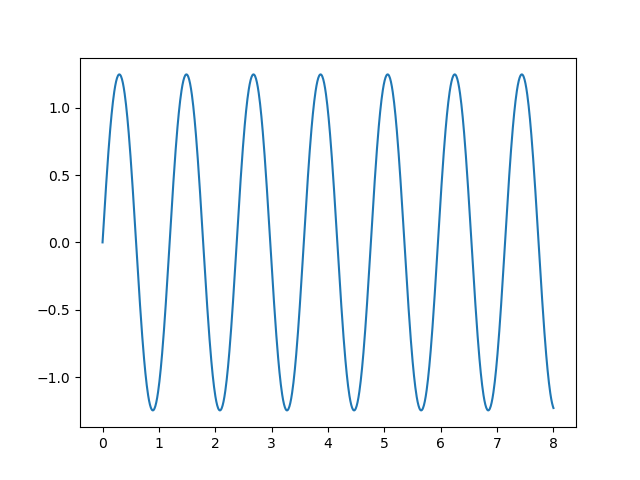

In [5]:
fig = plt.figure()
cx = fig.add_subplot()
cx.plot(t,dtheta_sol)



<IPython.core.display.Javascript object>


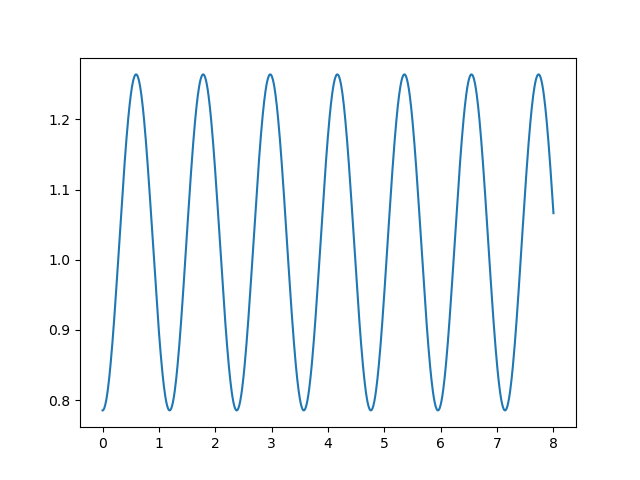

In [6]:
fig = plt.figure()
dx = fig.add_subplot()
dx.plot(t,theta_sol)



<IPython.core.display.Javascript object>


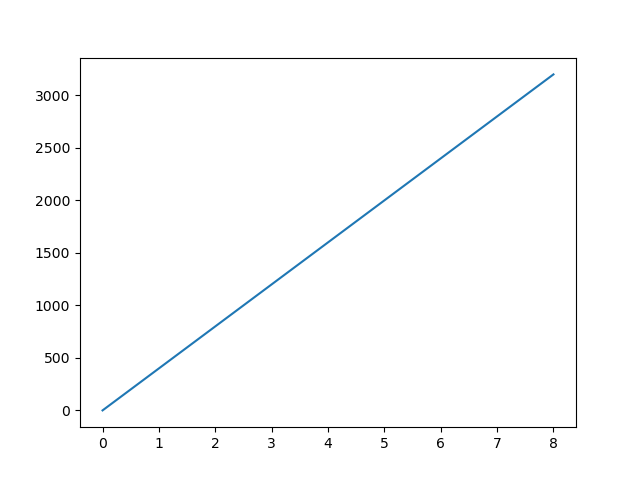

In [7]:
fig = plt.figure()
ex = fig.add_subplot()
ex.plot(t,psi_sol)


<IPython.core.display.Javascript object>


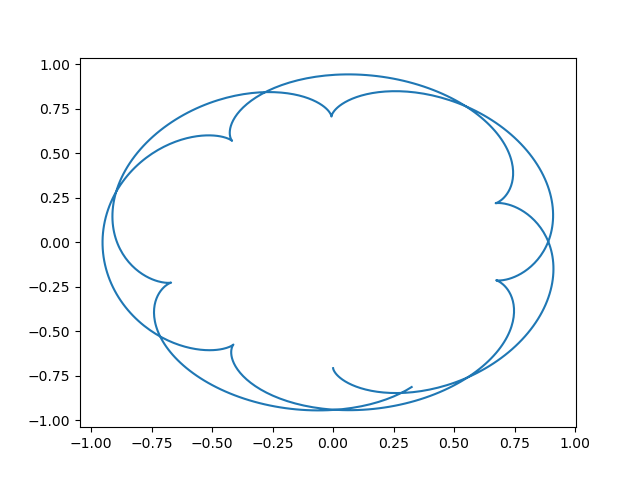

In [8]:
# Animación
x_t= np.sin(phi_sol)*np.sin(theta_sol)
y_t= -np.cos(phi_sol)*np.sin(theta_sol)
z_t =np.cos(theta_sol) 
r_t = np.sqrt(x_t**2+y_t**2)
s=10 # Escala

fig = plt.figure()
bx = fig.add_subplot()
bx.plot(x_t,y_t)
plt.show()



<IPython.core.display.Javascript object>


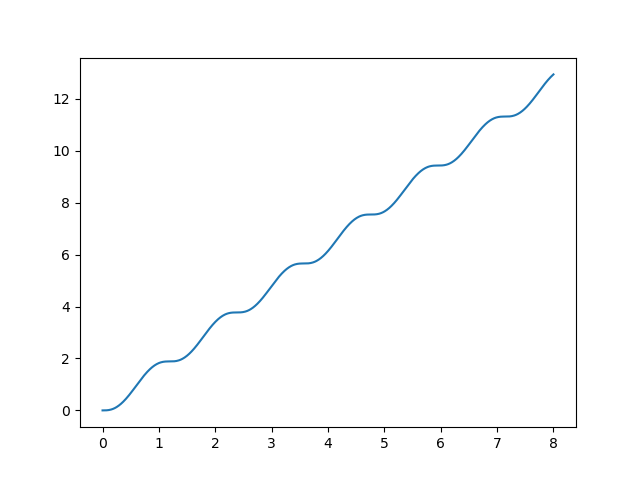

In [9]:
fig = plt.figure()
gx = fig.add_subplot()
gx.plot(t,phi_sol)
plt.show()

<IPython.core.display.Javascript object>


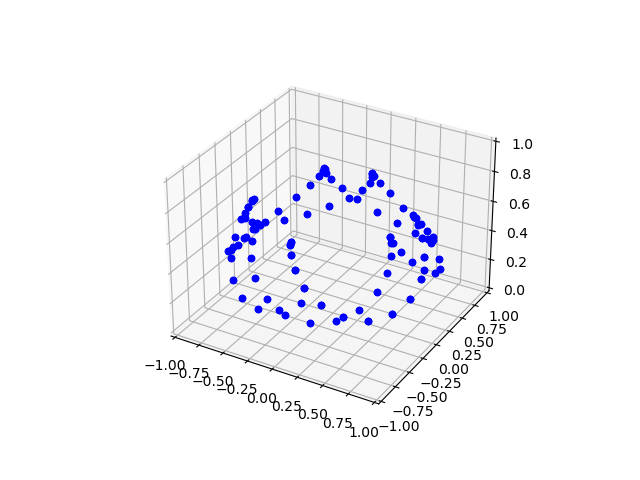

In [10]:
t = np.linspace(0,8,1000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.plot(x_t,y_t,z_t)


def init():
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(0, 1)
    
    
def Update(i,x_t,y_t,z_t,s):
    init() 
    
    
    
   
    x = x_t[::10][i]
    y = y_t[::10][i]
    z = z_t[::10][i]
    print(x,y,z)
    ax.scatter(x,y,z,color='b')
    #ax.quiver(0,0,0,x,y,z)
       
        

    #ax.scatter(x,y,z)
    
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t[::s]),fargs=(x_t,y_t,z_t,s),init_func=init)




La velocidad de precesion es 4.383311537620396 rad/seg


<IPython.core.display.Javascript object>


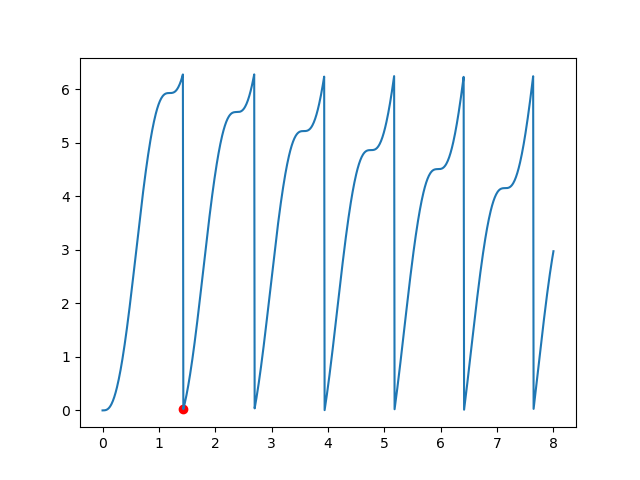

In [11]:
# Velocidad de precesión 
# Encontramos tiempo en el que phi vuelve a ser el mismo ( 0, 2pi), ahí sabemos que recorrio 2pi y hacemos 2pi/T = v
newPhi_sol = phi_sol[1:]
#print(phi_sol)
index = np.where((-0.05<newPhi_sol%2*np.pi)& (newPhi_sol%2*np.pi<0.05)) # el 0.05 es la tolerancia de error

time = t[index]
#print(time) # Se ven multiples tiempos, sin embargo se elige en el segundo ciclo donde vuelve a ser aprox 0
#El indice que corresponde a ese tiempo es el 179
time =t[179]# Al ver la grafica ( El punto donde phi%pi es aprox = 0 )
velocity = 2*np.pi/time
print("La velocidad de precesion es {} rad/seg".format(velocity))

fig = plt.figure()
fx = fig.add_subplot()
fx.plot(t, phi_sol%2*np.pi)
fx.scatter(t[179], (phi_sol%2*np.pi)[179], color='r')

